plotly as interactive plots?
overview of graph libs?

# Topic 3. Visual data analysis in Python
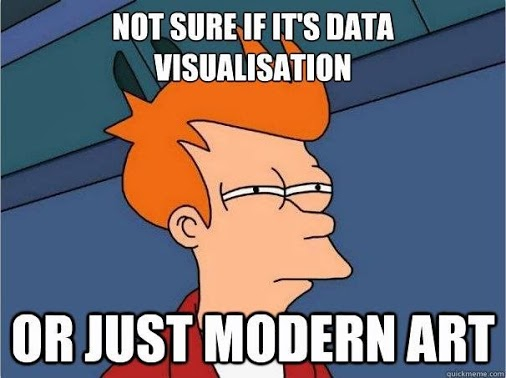


In [1]:
import json
with open('../../course_config.json') as json_file:
    CONFIG = json.load(json_file)

In [2]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn are basis for visualization in Python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Previously we've looked at the molecule dataset in <b>Primary data analysis with Pandas</b> topic. After certain feature engineering, we've built a more extended dataset. In this topic we'll learn how to provide visual data analysis

In [3]:
df = pd.read_csv(CONFIG['course_temp_files'] + '/merged_data.csv')
df.head()

,molecule_name,C,F,H,N,O,atoms_count,dim,av_min,bonds_ar,...,bonds_3,TPSA,NumValenceElectrons,MinPartialCharge,n_conj_bonds,n_explicit_hs,n_stereo_bonds,Wiener_index,DifPartialCharge,MaxPartialCharge
0,dsgdb9nsd_000001,1,0,4,0,0,5,3,109.471221,0,...,0,0.00,8.0,-0.077558,0,4,0,0.0,0.000000,-0.077558
1,dsgdb9nsd_000002,0,0,3,1,0,4,3,105.431863,0,...,0,35.00,8.0,-0.343926,0,3,0,0.0,0.000000,-0.343926
2,dsgdb9nsd_000003,0,0,2,0,1,3,3,103.715761,0,...,0,31.50,8.0,-0.411510,0,2,0,0.0,0.000000,-0.411510
3,dsgdb9nsd_000004,2,0,2,0,0,4,3,179.974377,0,...,1,0.00,10.0,-0.123544,0,2,0,1.0,0.000000,-0.123544
4,dsgdb9nsd_000005,1,0,1,1,0,3,3,179.974377,0,...,1,23.79,10.0,-0.201967,0,1,0,1.0,0.248131,0.046163


Let's create a couple more bond-related columns for our dataframe

In [4]:
df['is_double_bonded'] = df['bonds_2'].apply(lambda x: True if x > 1 else False)
df['is_triple_bonded'] = df['bonds_3'].apply(lambda x: True if x > 1 else False)
df.loc[df['bonds_1'] > 0, 'top_bond'] = 1 
df.loc[df['bonds_2'] > 0, 'top_bond'] = 2
df.loc[df['bonds_3'] > 0, 'top_bond'] = 3
df.loc[df['bonds_4'] > 0, 'top_bond'] = 4

Moreover, let's also merge in previously used potential_energy dataset.

In [5]:
df = pd.merge(df, pd.read_csv(CONFIG['dataset_path'] + '/champs-scalar-coupling/potential_energy.csv'), how='outer', on=['molecule_name'])

To determine types of column values in our datatable, we'll use `dtypes` property

In [6]:
df.dtypes

molecule_name               object
C                            int64
F                            int64
H                            int64
N                            int64
O                            int64
atoms_count                  int64
dim                          int64
av_min                     float64
bonds_ar                     int64
chiral                        bool
sm_mean                    float64
av_max                     float64
num_bonds                    int64
sm_min                     float64
total_energy               float64
total_spin_multiplicity      int64
sm_max                     float64
bonds_4                      int64
total_charge                 int64
av_mean                    float64
bonds_1                      int64
bonds_2                      int64
bonds_3                      int64
TPSA                       float64
NumValenceElectrons        float64
MinPartialCharge           float64
n_conj_bonds                 int64
n_explicit_hs       

## Univariate visualization

Univariate analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

### Quantitative features

Quantitative features take on ordered numerical values. Those values can be discrete, usually integers, or continuous, usually floats.

#### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its histogram using the DataFrame's method `hist()`.

array([[<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'O'}>]], dtype=object)

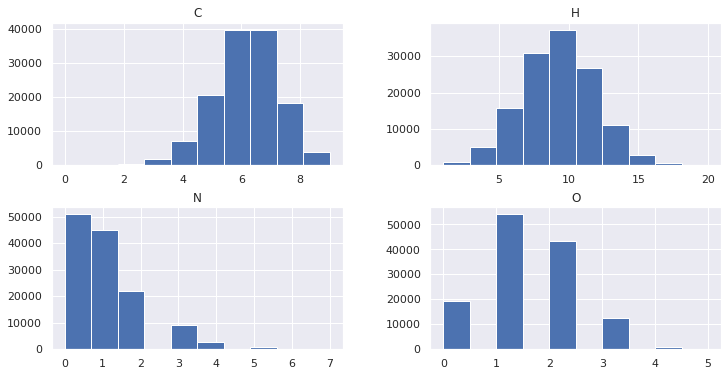

In [7]:
elements = ['C', 'H', 'N', 'O']
df[elements].hist(figsize=(12, 6), bins=10)

As we want more customization, we'll use `matplotlib` library directly. Choosing incorrect number of bins can cause misinterpreation of the data, especially if the data is discrete. Let's look at `H` element distribution with different number of bins

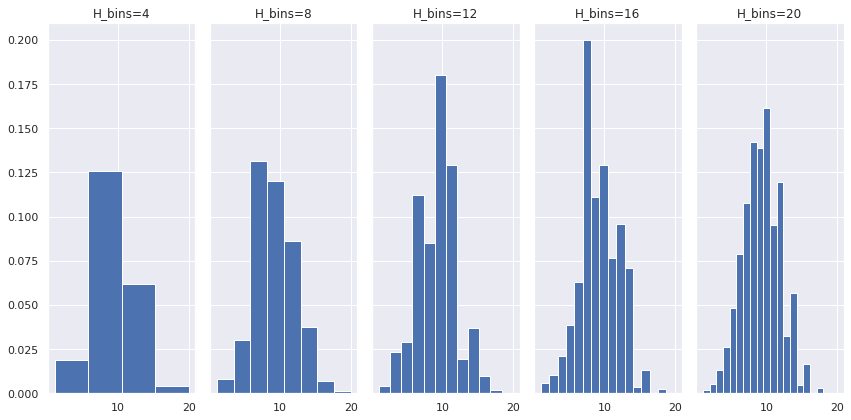

In [8]:
fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True, figsize=(12, 6))

for i in range(5):
    axs[i].hist(df['H'], bins=(i+1)*4, density=True)
    axs[i].title.set_text('H_bins={0}'.format((i+1)*4))

All `H` distributions are more-less Gaussian, but depending on the number of bins we can incorrectly interpretate a single histogram

To build our elements' distributions, we'll create 1 row of 4 subplots. We'll set the number of bins as the max value of the category.

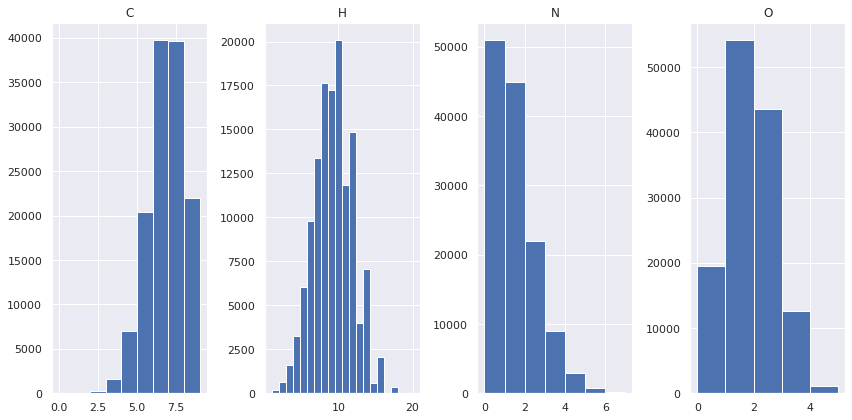

In [9]:
fig, axs = plt.subplots(1, 4, tight_layout=True, figsize=(12, 6))

for index, element in enumerate(elements):
    axs[index].hist(df[element], bins=df[element].max())
    axs[index].title.set_text(element)

A histogram groups values into bins of equal value range. The shape of the histogram may contain clues about the underlying distribution type: Gaussian, exponential, etc. You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. Knowing the distribution of the feature values becomes important when you use Machine Learning methods that assume a particular type (though, most often it's Gaussian).

In addition of using a barchart to display discrete values, we can draw distributions in the form of plots, allowing to show continious values. For example, let's plot several angle-feature distributions. We'll use `sharex` parameter to better compare plots among each other

In [10]:
angles = ['sm_min','sm_mean','sm_max','av_min','av_mean','av_max']

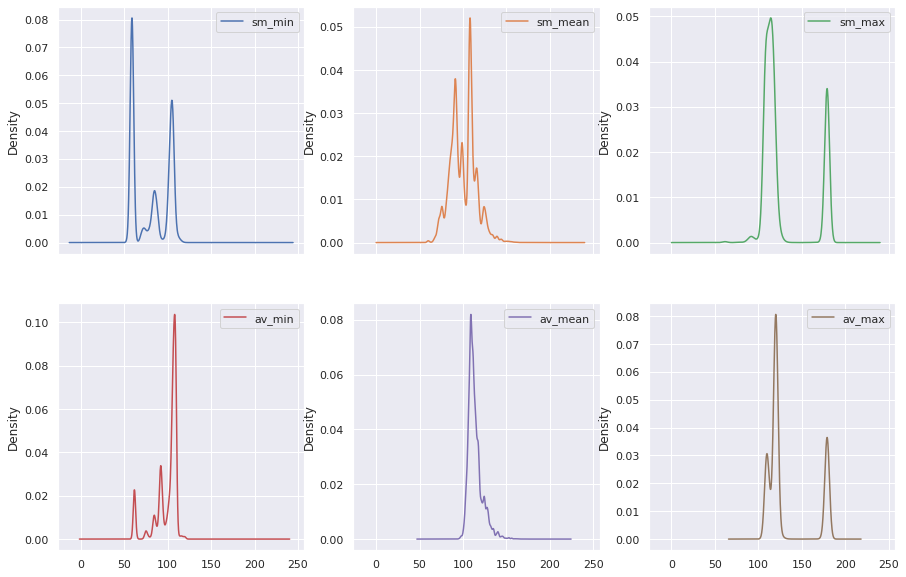

In [11]:
df[angles].plot(kind='density', subplots=True, layout=(2, 3), 
                  sharex=True, figsize=(15, 10));

Plotting a distribution of observations is also possible with seaborn's `distplot()` method. 
Let's take look at the distribution of `TPSA` feature. 
By default, the plot displays both the histogram with the kernel density estimate (KDE) on top.


<AxesSubplot:xlabel='TPSA', ylabel='Density'>

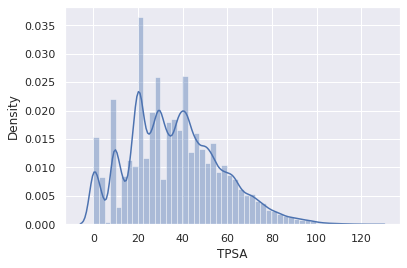

In [12]:
sns.distplot(df['TPSA'])

#### Box Plots

Bla-bla-bla quartiles. Talked about prev in Primary data... To display quartiles usually a boxplot is used. Let's draw a boxplot of `TPSA` feature

<AxesSubplot:xlabel='TPSA'>

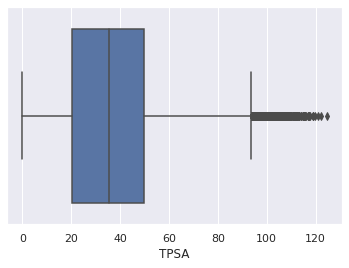

In [13]:
sns.boxplot(x='TPSA', data=df)

### Quantitative vs. Categorical features

We can also draw grouped boxplots, to compare their distributions on a single graph, depending on the value of some category. Let's look at `TPSA` distributions for different `total_spin_multiplicity` values

<AxesSubplot:title={'center':'TPSA'}, xlabel='total_spin_multiplicity'>

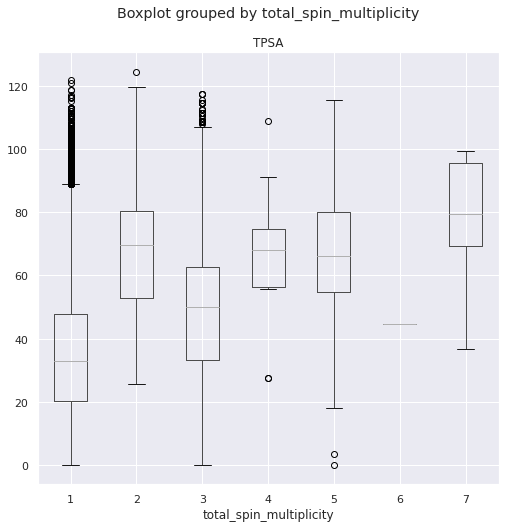

In [14]:
df.boxplot(column=['TPSA'], by='total_spin_multiplicity',figsize=(8, 8))

Boxplots can be grouped by several values. For example, we'll group boxplot distributions of `potential_energy` values dependeing on `O` number and `chirality`

<AxesSubplot:title={'center':'potential_energy'}, xlabel='[O, chiral]'>

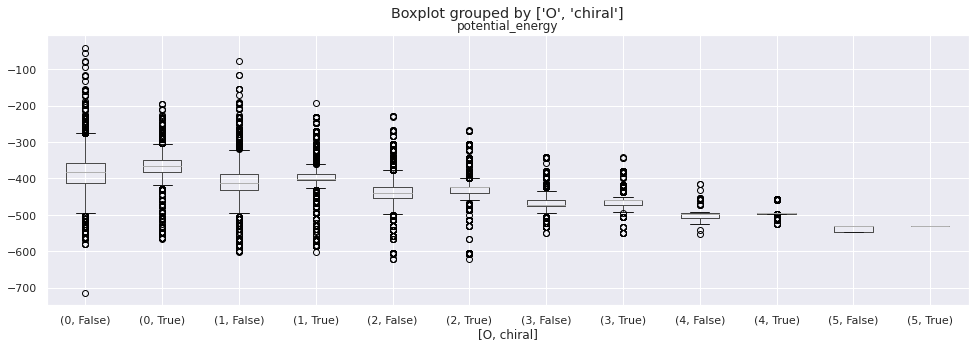

In [15]:
df.boxplot(column=['potential_energy'], by=['O', 'chiral'],figsize=(16, 5))

Grouping order is quite important. We can easily compare `chiral` influence on `potential` energy depending on the number of `O` molecules - it seems the distributions are narrower with average values generally higher. But the impact of `O` count isn't that clear. Let's flip the categories, so it'll become more obvious

<AxesSubplot:title={'center':'potential_energy'}, xlabel='[chiral, O]'>

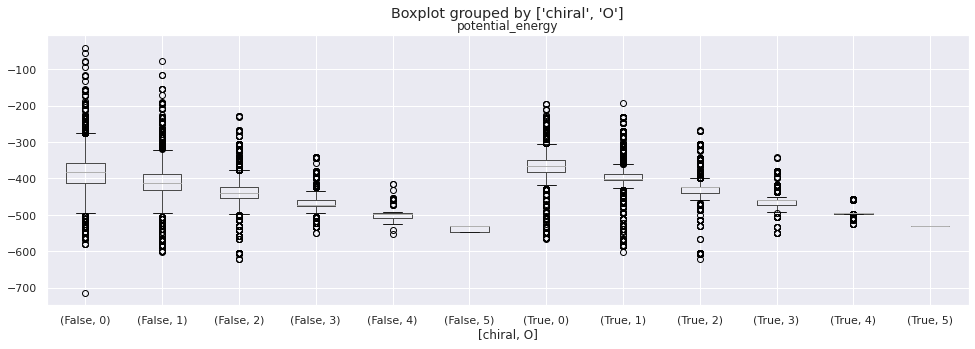

In [16]:
df.boxplot(column=['potential_energy'], by=['chiral', 'O'],figsize=(16, 5))

As you may see, the lower the `O` ammount, the lower the `potential_energy`. It's quite illustrative, but now the influence of `chirality` isn't obvious.

At last, let's plot a similar boxplot, using `N` instead of `O` category and removing chirality

<AxesSubplot:title={'center':'potential_energy'}, xlabel='[N]'>

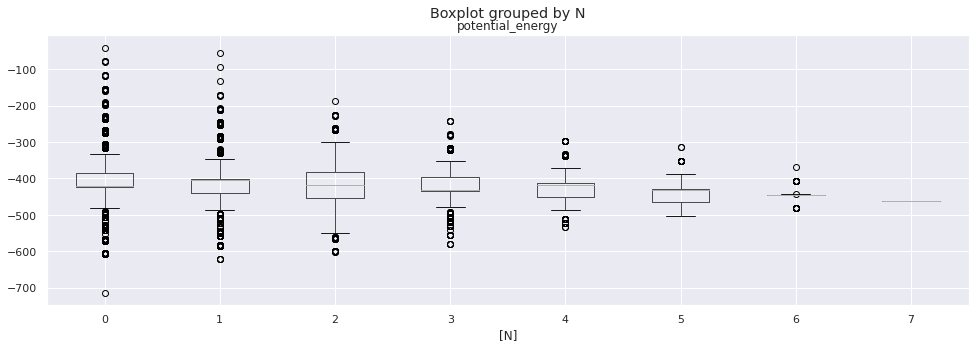

In [17]:
df.boxplot(column=['potential_energy'], by=['N'],figsize=(16, 5))

Pay attention to discrete changes of outliers. That is quite unusual and I encourage you to look for an explanation yourself :)

#### Violin plots

Violin plot is a combination of a boxplot and a kernel density estimate. It is more informative, though less illustrative<br>Reference: https://seaborn.pydata.org/generated/seaborn.violinplot.html

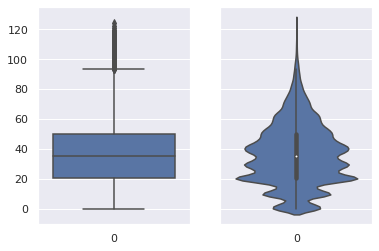

In [18]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['TPSA'], ax=axes[0]);
sns.violinplot(data=df['TPSA'], ax=axes[1]);

Asymmetric violin plots allows to combine categorial feature with a boolean on the same chart. Let's look how our `TPSA` values are spread accross the number of `C` atoms and `chirality`

<AxesSubplot:xlabel='C', ylabel='TPSA'>

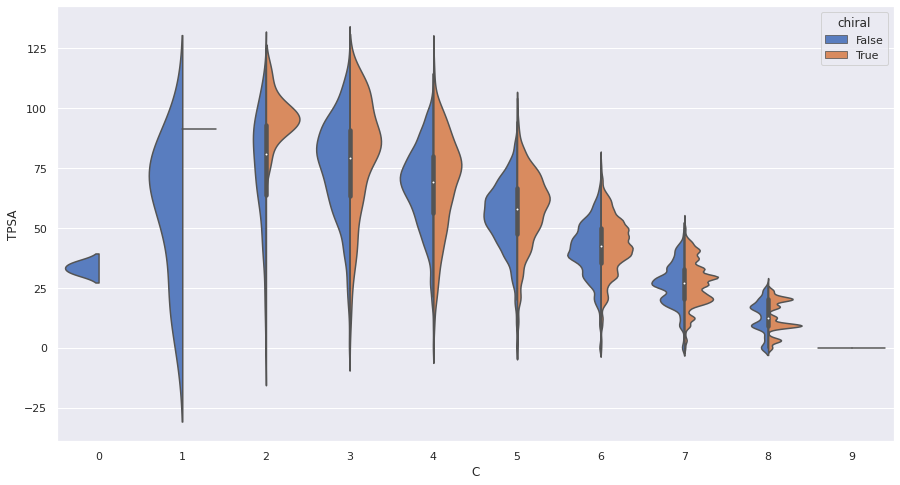

In [19]:
plt.figure(figsize=(15,8))
sns.violinplot(x='C', y='TPSA', hue='chiral', data=df, palette="muted", split=True)

Such plots might be much more informative compared to grouped boxplots, but it depends on the case. At last, let's see how angles of molecules depend on the fact, if the molecule is double or triple bonded

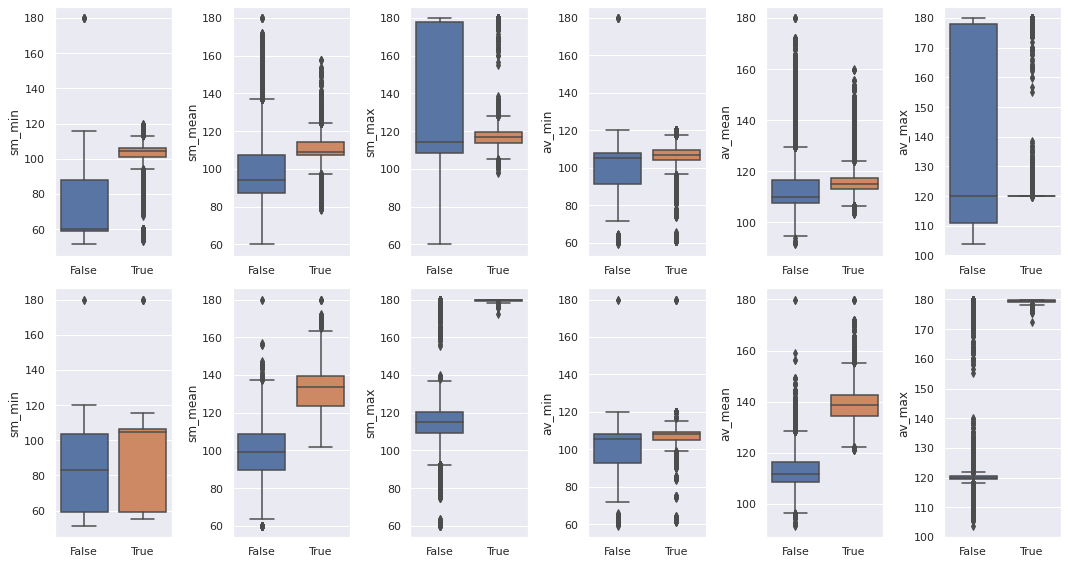

In [20]:
bonded = ['is_double_bonded', 'is_triple_bonded']
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 8))
for idx, feature in enumerate(angles*2):
    ax = axes[idx//6, idx % 6]
    sns.boxplot(x=bonded[idx//6], y=feature, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feature)
fig.tight_layout();

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called `catplot()`, that accept different types of plots as a `kind` parameter. It allows to simplify our complex charts.

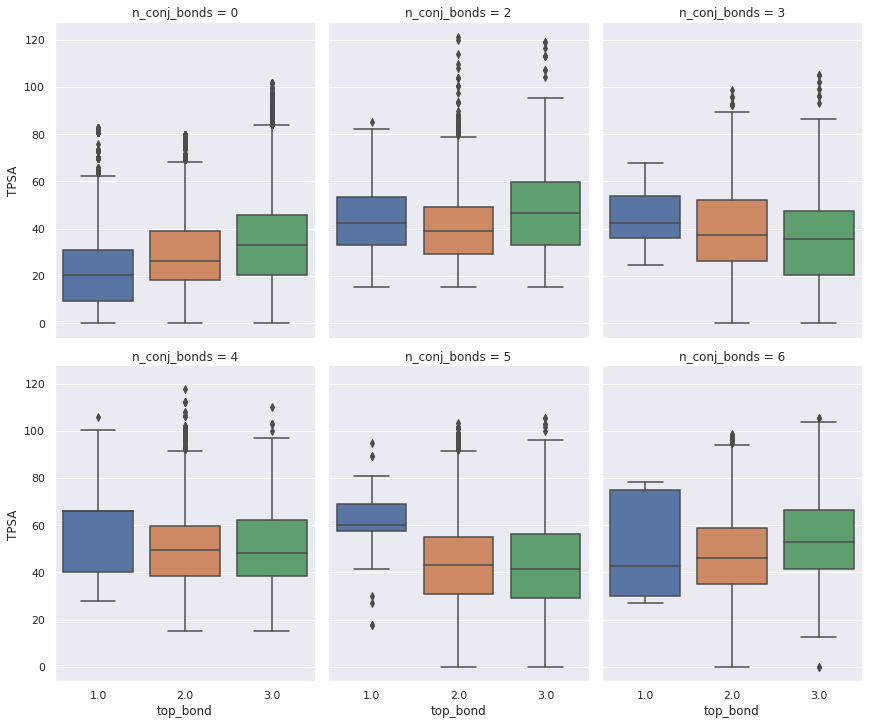

In [21]:
sns.catplot(x='top_bond', y='TPSA', col='n_conj_bonds',
               data=df[df['n_conj_bonds'] < 7], kind="box",
               col_wrap=3, height=5, aspect=.8);

### Categorical and binary features¶

Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. <br>Binary variables are an important special case of categorical variables when the number of possible values is 2. If the values of a categorical variable are ordered, it is called ordinal.

#### Bar plots

The bar plot is a graphical representation of the frequency table. The easiest way to create it is to use the seaborn's function `countplot()`. There is another function in seaborn that is somewhat confusingly called `barplot()` and is mostly used for representation of some basic statistics of a numerical variable grouped by a categorical feature.
We'll plot a countplot and a barplot to display relations between `n_conj_bonds` and `chiral` features

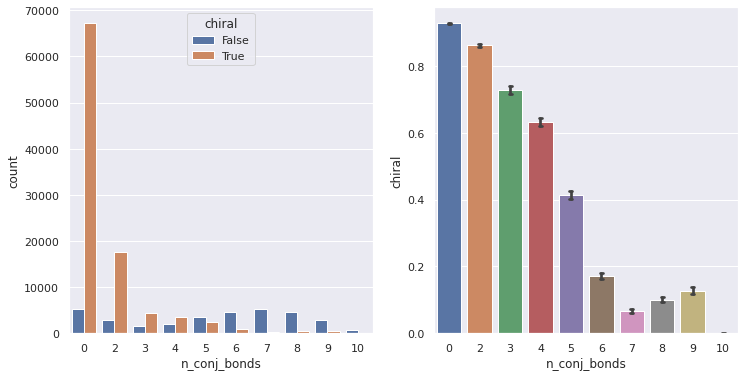

In [22]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x='n_conj_bonds', data=df, hue='chiral', ax=axes[0]);
sns.barplot(x="n_conj_bonds", y="chiral", data=df, capsize=.1, ax=axes[1]);

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:
<table style="text-align: left"> 
    <tr ><td><b>Histograms</b></td><td><b>Bar plots</b></td></tr>
    <tr><td>Best suited for looking at the distribution of numerical variables</td>
        <td>Best suited for categorical features</td></tr>
    <tr><td>Values on the X-axis are numerical</td>
        <td>Any type of values on the X-axis</td></tr>
    <tr><td>X-axis is a coordinate axis along which values cannot be changed</td>
        <td>Ordering of bars is not predefined, may be sorted</td></tr>
</table>

#### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method `corr()` on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to `heatmap()`, which renders a color-coded matrix for the provided values. In our case we'll look into the correlations between number of bonds and element content

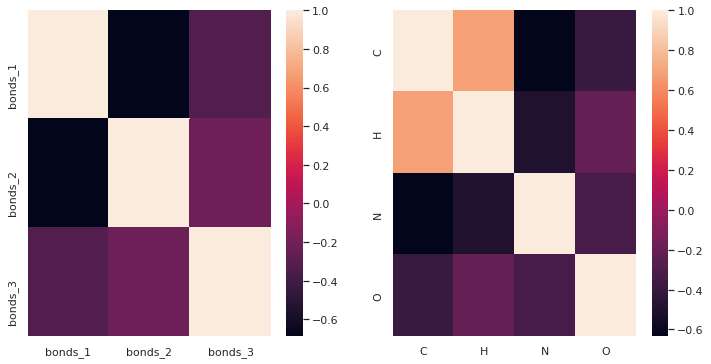

In [23]:
bonds= ['bonds_1','bonds_2','bonds_3']

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
corr_matrix_b = df[bonds].corr()
corr_matrix_e = df[elements].corr()
sns.heatmap(corr_matrix_b, ax=axes[0]);
sns.heatmap(corr_matrix_e, ax=axes[1]);

As we would've suggested, the amount of single, double and triple bonds are independent. Whereas the number of `C` and `H` are somehow related. In general, we can say, that the higher the number of carbon atoms, the higher number of hydrogen atoms we expect in a molecule. The number of `N` and `O` atoms don't depend on the length of the carbon skeleton. Now, as we have an understanding of what a correlation matrix is, let's build one for all our features

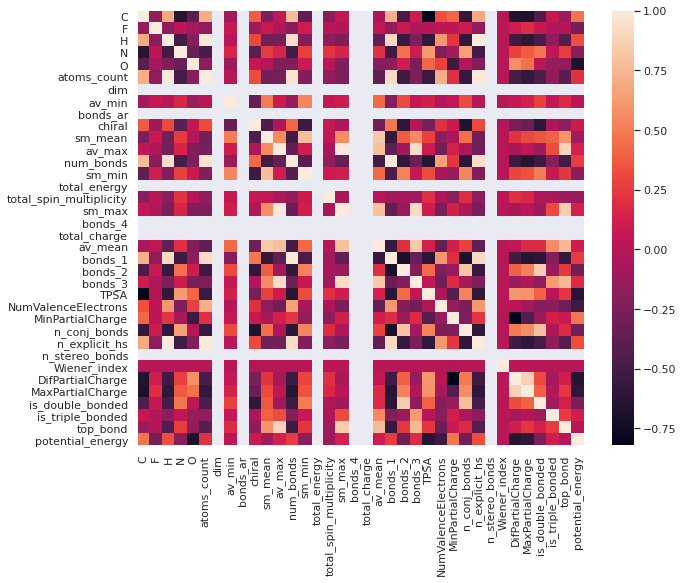

In [24]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix);

Correlation matrixes are quite useful to eliminate unuseful features. From the heatmap above you can notice categories that don't change, as invariative (`total_charge`, `bonds_4`, etc.). Besides you might find strongly dependent categories (`H` and `explicit_hs` -- corr_ratio = 0.999988, what makes sense). These should also be excluded. Strong correlations are also seen in pairs:
<ul><li>'av_max'  -- 'sm_max' : 0.989452
    <li>'atoms_count' -- 'H' : 0.985269
    <li>'bonds_1' -- 'num_bonds' : 0.984487
    <li>'bonds_3' -- 'av_max': 0.922973
    <li>...
</ul>
Such strong dependencies are easily explained and don't provide any insights, but may be used to decrease the number of features. More about that, we'll study during our data cleaning topic.

### Quantitative vs. Quantitative

#### Scatter plots and diagrams

The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D space (*scatter plots in 3D are also possible)*. Often scatter plots are built to illustrate xy dependency for a limited number of observations. 
<br>For illustrative purposes, we'll construct a subdataframe with a limited number of points. We'll deal with scatter and line plots a lot during the course

In [25]:
sub_df = df[:10].sort_values(by=['potential_energy'])

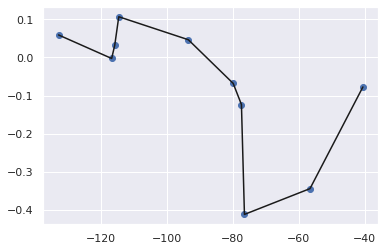

In [26]:
plt.plot(sub_df['potential_energy'], sub_df['MaxPartialCharge'], 'bo', ##dots
         sub_df['potential_energy'], sub_df['MaxPartialCharge'], 'k')  ##line

Such plots are often used in time-related analysis, when for any X you have only one Y value.
<br>More often you'll deal with correlation fields. Let's build one for `MaxPartialCharge` and `DifPartialCharge` features

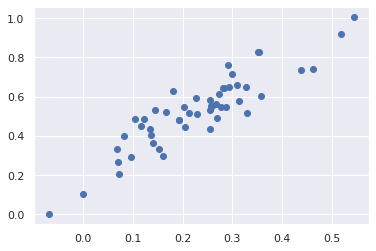

In [27]:
sub_df = df[df['atoms_count'] == 8]
plt.scatter(sub_df['MaxPartialCharge'],sub_df['DifPartialCharge'])

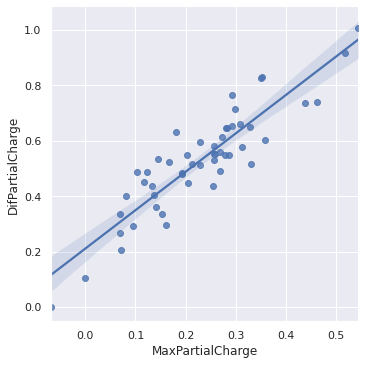

In [28]:
sns.lmplot('MaxPartialCharge', 'DifPartialCharge', data=sub_df)

For larger amount of observations we'll build a scatter diagram for `DifPartialCharge` and `TPSA` features. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='DifPartialCharge', ylabel='TPSA'>

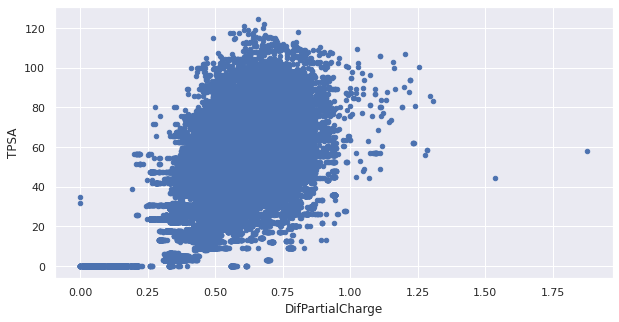

In [29]:
df.plot(kind='scatter', x='DifPartialCharge', y='TPSA',figsize=(10, 5))

## Multivariate and complex visualization

Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

The previous correlation field gave us some information, though not much. Using colormaps, we can extract more information from the plot. Let's color code `O` and `N` features

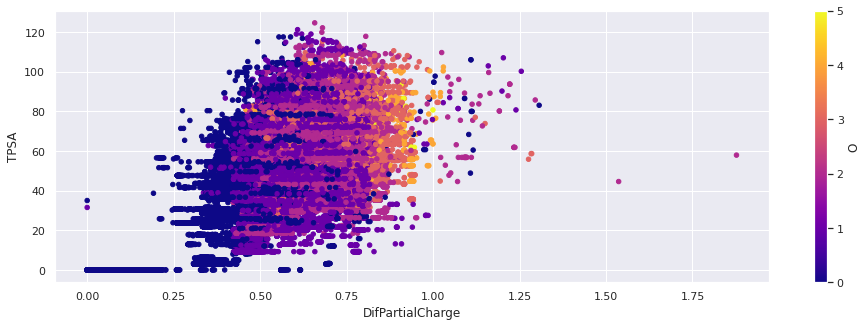

In [30]:
fig, ax = plt.subplots(figsize=(16, 5))
df.plot(kind='scatter', x='DifPartialCharge', y='TPSA', c='O', cmap="plasma", ax=ax);

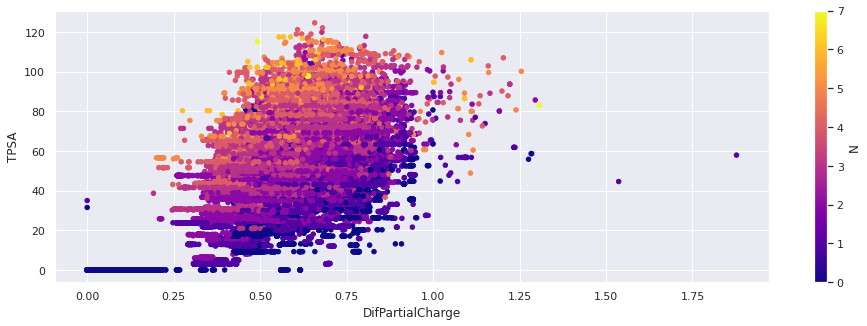

In [31]:
fig, ax = plt.subplots(figsize=(16, 5))
df.plot(kind='scatter', x='DifPartialCharge', y='TPSA', c='N', cmap="plasma", ax=ax);

We can support our scatter plot with side histograms using seaborn jointplot, as it's shown below:

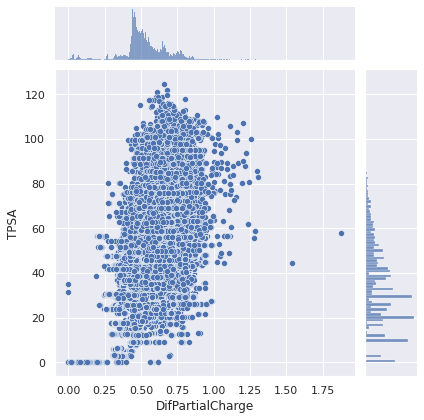

In [32]:
sns.jointplot(x='DifPartialCharge', y='TPSA', data=df, kind='scatter');

We can use kernel density estimate (kde) to plot x-y continious dependencies. Let's continue decsribing same parameters on the jointplot below

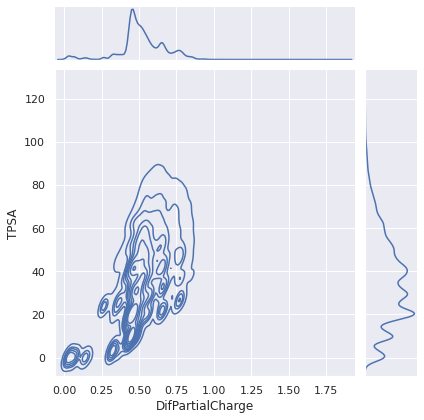

In [33]:
sns.jointplot('DifPartialCharge', 'TPSA', data=df, kind="kde");

If, you want to build a 3D scatter field that is also posible, as shown on the plot below:

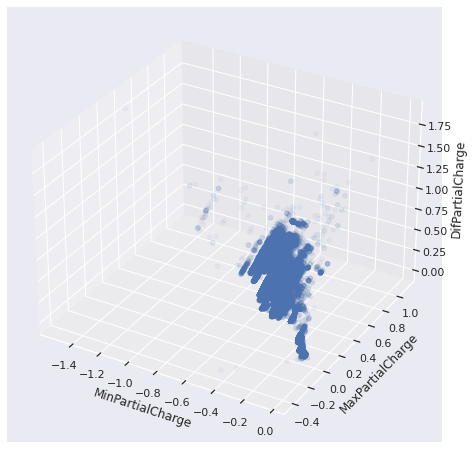

In [34]:
charges = ['MinPartialCharge', 'MaxPartialCharge','DifPartialCharge']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df[charges[0]]
ys = df[charges[1]]
zs = df[charges[2]]
ax.scatter(xs, ys, zs, marker='o', alpha=0.05)

ax.set_xlabel(charges[0])
ax.set_ylabel(charges[1])
ax.set_zlabel(charges[2])

plt.show()

#### Scatterplot matrix

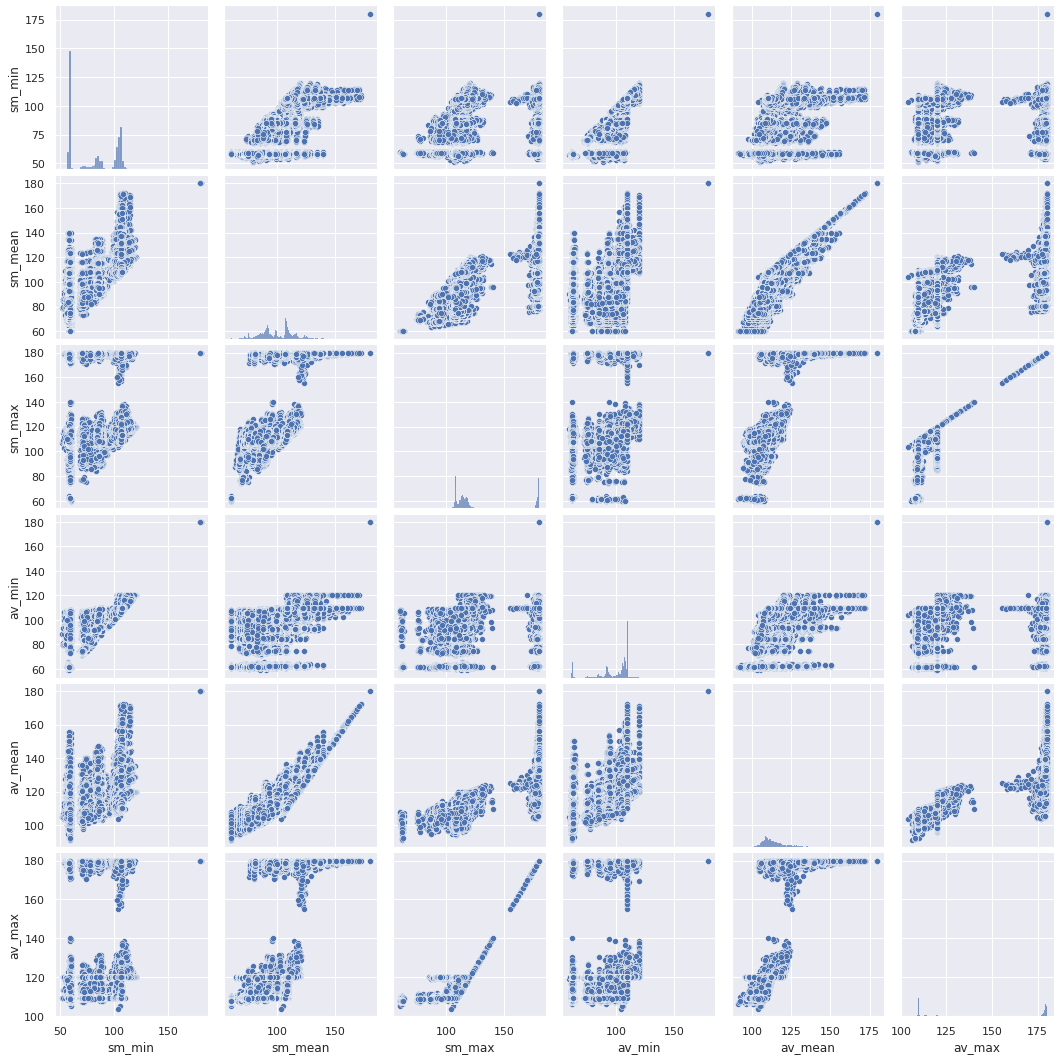

In [35]:
sns.pairplot(df[angles])

Scatter plot points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the `scatter()` function seen above, but, let's try a previously called `lmplot()` and use the parameter hue to indicate our categorical feature of interest

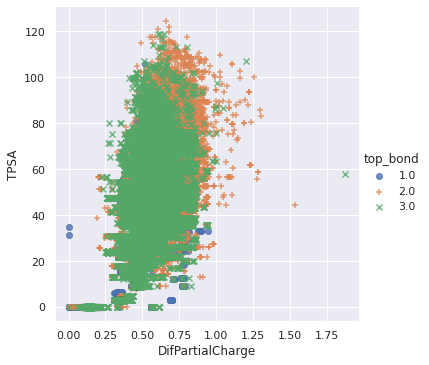

In [36]:
sns.lmplot('DifPartialCharge', 'TPSA', data=df, hue='top_bond', markers=["o", "+", "x"], fit_reg=False)

Besides scatter plots, we can build contour maps to dispay distributions

<AxesSubplot:xlabel='DifPartialCharge', ylabel='TPSA'>

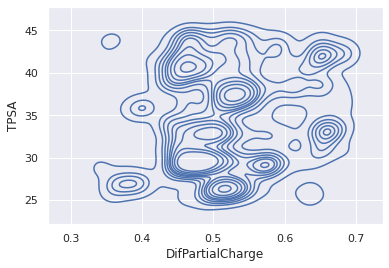

In [37]:
sub_df = df[(df['DifPartialCharge'] > 0.3) & (df['DifPartialCharge'] < 0.7) & (df['TPSA']>25) & (df['TPSA']<45)]
sns.kdeplot(sub_df['DifPartialCharge'], sub_df['TPSA'])

### Categorical vs. Categorical

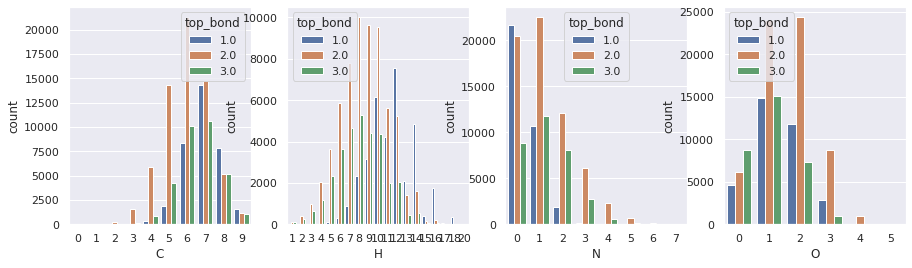

In [38]:
_, axes = plt.subplots(1, 4, figsize=(15, 4))
for idx, el in enumerate(elements):
    sns.countplot(x=el, hue='top_bond', data=df, ax=axes[idx]);

Another way to show distributions are heatmaps, we've used earlier. In the following example we'll us `pd.crosstab()` function to build a dependency table and pass the resulted dataframe to the heatmap function.
<br><i>Q: Why using pd.crosstab() isn't a good option for most of the cases?</i>

<AxesSubplot:xlabel='Wiener_index', ylabel='atoms_count'>

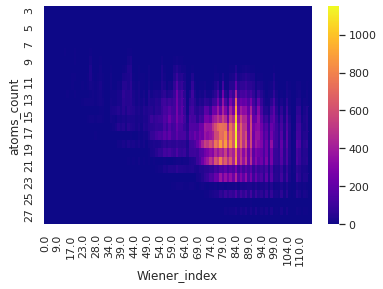

In [39]:
sns.heatmap(pd.crosstab(df['atoms_count'], df['Wiener_index']), cmap="plasma")

In this topic, we've touched some of the visualization tecniques widely used to analyse data. The better you understand the data -- the more effective solutions you'll build

References:
<ul><li>
    </ul>

## Bonus: Whole dataset visualizations

<b>Naive approach</b>¶

We have been looking at different facets of our dataset by guessing interesting features and selecting a small number of them at a time for visualization. We have only dealt with two to three variables at once and were easily able to observe the structure and relationships in data. But, what if we want to display all the features and still be able to interpret the resulting visualization?

We could use `hist()` or create a scatterplot matrix with `pairplot()` for the whole dataset to look at all of our features simultaneously. But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and inefficient. Besides, we would still be analyzing our variables in a pairwise fashion, not all at once.
<hr>

Most real-world datasets have many features, sometimes, many thousands of them. Each of them can be considered as a dimension in the space of data points. Consequently, more often than not, we deal with high-dimensional datasets, where entire visualization is quite hard.

To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data. This task is called dimensionality reduction and is an example of an unsupervised learning problem because we need to derive new, low-dimensional features from the data itself, without any supervised input.

One of the well-known dimensionality reduction methods is <b>Principal Component Analysis (PCA)</b>, which we will study later in this course. Its limitation is that it is a linear algorithm that implies certain restrictions on the data.

There are also many non-linear methods, collectively called Manifold Learning. One of the best-known of them is <b>t-SNE</b>

#### t-SNE

In [40]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [41]:
tsne_columns = angles + charges + elements + bonds + ['TPSA']
len(tsne_columns)

17

In [42]:
tsne_df = df[tsne_columns].iloc[0:10000]

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tsne_df)

In [44]:
tsne = TSNE(random_state=17, perplexity=10.0)
tsne_repr = tsne.fit_transform(X_scaled)

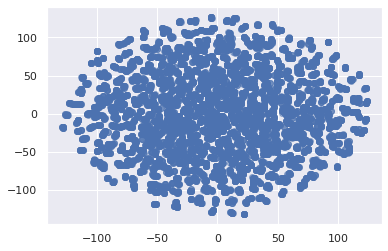

In [45]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

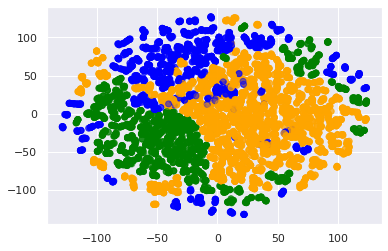

In [46]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['top_bond'].iloc[0:10000].map({1: 'blue', 2: 'orange', 3:'green'}), alpha=.5);

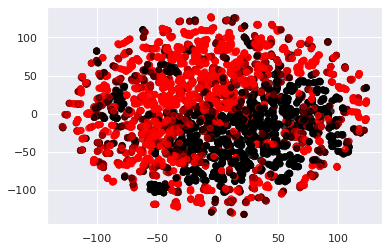

In [47]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['chiral'].iloc[0:10000].map({True:'red', False:'black'}), alpha=.5);

Finally, let's note some disadvantages of t-SNE:

    High computational complexity. The implementation in scikit-learn is unlikely to be feasible in a real task. If you have a large number of samples, you should try Multicore-TSNE instead.
    The plot can change a great deal depending on the random seed, which complicates interpretation. Here is a good tutorial on t-SNE. In general, you shouldn't make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.

Occasionally, using t-SNE, you can get a really good intuition for the data.

We'll get hand-on experience with t-SNE and PCA later in the course.

We will save our t-SNE field, as later in the course we will need it.

In [48]:
#ending to do

In [49]:
np.savetxt(CONFIG['course_temp_files'] + '/tsne_top_bond.csv', np.append(tsne_repr, df[['top_bond']].iloc[:10000].to_numpy(), axis=1), delimiter=",", fmt='%1.3f')

In [50]:
np.savetxt(CONFIG['course_temp_files'] + '/tsne_chiral.csv', np.append(tsne_repr, df[['chiral']].iloc[:10000].to_numpy(), axis=1), delimiter=",", fmt='%1.3f')